In [41]:
import numpy as np
import os, csv
import matplotlib.pyplot as plt
import librosa
import IPython.display

In [42]:
# has to be set in order to show the image in notebook
%matplotlib inline 

In [43]:
try:
    os.chdir("./Resources")
except:
    pass

y, sr = librosa.load("./single-kick.wav", duration=8)
# returns a numpy array series => assigned to y
#   and the sampling rate of y => assigned to sr (signal rate)

IPython.display.Audio(data=y, rate=sr)

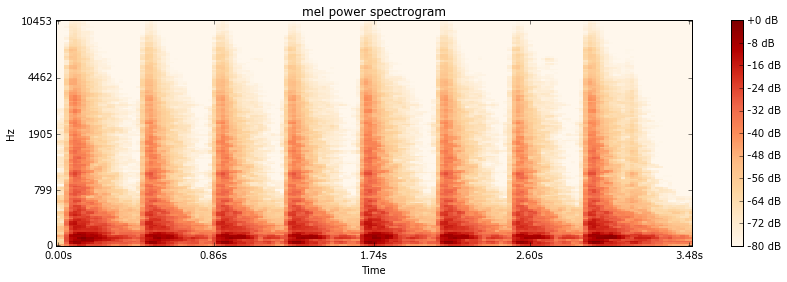

In [44]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

# Convert to log scale (dB). We'll use the peak power as reference.
log_S = librosa.logamplitude(S, ref_power=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

In [45]:
onset_frames = librosa.onset.onset_detect(y=y, sr=sr)
onset_times  = librosa.frames_to_time(onset_frames[:], sr=sr)

(0.0, 152.0, 0.0, 21.065352940882068)

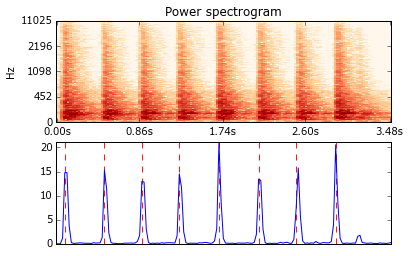

In [50]:
D = np.abs(librosa.stft(y))**2
plt.figure()

plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.logamplitude(D, ref_power=np.max), x_axis='time', y_axis='log')
plt.title('Power spectrogram')

plt.subplot(2, 1, 2)
plt.plot(o_env, label='Onset strength')
plt.vlines(onset_frames, 0, o_env.max(), color='r', alpha=0.9, linestyle='--', label='Onsets')
plt.xticks([])
plt.axis('tight')

In [75]:
onset_stfts = []
for frame in onset_frames:
    print np.abs(D[:, time])
    onset_stfts.append(np.abs(D[:, frame]))

[  1.17549881e-01   1.48398755e-02   1.41943097e+00 ...,   2.91551828e-06
   1.38255182e-05   2.37400127e-05]
[  1.17549881e-01   1.48398755e-02   1.41943097e+00 ...,   2.91551828e-06
   1.38255182e-05   2.37400127e-05]
[  1.17549881e-01   1.48398755e-02   1.41943097e+00 ...,   2.91551828e-06
   1.38255182e-05   2.37400127e-05]
[  1.17549881e-01   1.48398755e-02   1.41943097e+00 ...,   2.91551828e-06
   1.38255182e-05   2.37400127e-05]
[  1.17549881e-01   1.48398755e-02   1.41943097e+00 ...,   2.91551828e-06
   1.38255182e-05   2.37400127e-05]
[  1.17549881e-01   1.48398755e-02   1.41943097e+00 ...,   2.91551828e-06
   1.38255182e-05   2.37400127e-05]
[  1.17549881e-01   1.48398755e-02   1.41943097e+00 ...,   2.91551828e-06
   1.38255182e-05   2.37400127e-05]
[  1.17549881e-01   1.48398755e-02   1.41943097e+00 ...,   2.91551828e-06
   1.38255182e-05   2.37400127e-05]


In [94]:
#librosa.output.times_csv("../data/kickDrumFrames.csv", onset_times, onset_stfts)
#print "Successfully saved file."
with open('../data/kickDrumFrames.csv', 'w+') as f:
    fw = csv.writer(f, delimiter=',')
    for i in range(len(onset_frames)):
        fw.writerow([onset_frames[i], onset_stfts[i].tolist()])
        
        for data in onset_stfts[i].tolist():
            print data,
        print '\n'
        

0.0265043787658 0.00434282049537 3.22348570824 16.5785388947 0.0346556045115 211.119369507 759.045227051 577.454772949 183.583114624 208.618011475 94.4111938477 106.141090393 46.6431465149 154.177780151 225.30279541 98.6082992554 385.926574707 322.068939209 63.8051567078 49.7394866943 23.6214962006 8.0326499939 5.69548416138 26.0040798187 32.9033851624 41.1578178406 56.4709587097 39.2578163147 8.10371589661 12.706823349 73.9970626831 59.095741272 55.7470664978 54.5954742432 58.4243431091 32.4629173279 7.14752483368 13.4169025421 11.3330469131 4.75573158264 1.54206979275 3.87761497498 11.3073549271 33.0293540955 30.4923973083 4.19535732269 11.873758316 18.5925865173 12.9630737305 9.45232963562 4.17464494705 0.405337065458 4.5321149826 1.16345572472 6.95672988892 8.18238162994 2.30552077293 0.269139409065 1.54331290722 2.15464448929 2.24567723274 2.28885126114 3.65192246437 6.37520170212 2.39601135254 0.359434336424 0.807887852192 0.280460655689 0.378538042307 1.0300655365 2.90040612221 